<a href="https://colab.research.google.com/github/kbarismath/Heart-Disease-Recognition-in-R/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES AND DATASET

In [1]:
install.packages("caret")
install.packages("gplots")
install.packages("GGally")
library(dplyr)
library(tidyr)
library(readr)
library(caret)
library(ggplot2)
library(gplots)
library(GGally)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice


Attaching

In [3]:
df <- read.csv("heart.csv")
head(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1




1.   age
2.   sex
3.   chest pain type (4 values)
4.   resting blood pressure
5.   serum cholesterol in mg/dl
6.   fasting blood sugar > 120 mg/dl
7.   resting electrocardiographic results (values 0,1,2)
8.   maximum heart rate achieved
9.   exercise induced angina
10.   oldpeak = ST depression induced by exercise relative to rest
11.   the slope of the peak exercise ST segment
12.   number of major vessels (0-3) colored by flourosopy
13.   thal: 0 = normal; 1 = fixed defect; 2 = reversable defect








In [4]:
dim(df)

[1] 1025   14

In [5]:
summary(df)

      age             sex               cp            trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.0000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :1.0000   Median :130.0  
 Mean   :54.43   Mean   :0.6956   Mean   :0.9424   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.0000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.0000   Max.   :200.0  
      chol          fbs            restecg          thalach     
 Min.   :126   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:132.0  
 Median :240   Median :0.0000   Median :1.0000   Median :152.0  
 Mean   :246   Mean   :0.1493   Mean   :0.5298   Mean   :149.1  
 3rd Qu.:275   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope             ca        
 Min.   :

In [6]:
str(df)

'data.frame':	1025 obs. of  14 variables:
 $ age     : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex     : int  1 1 1 1 0 0 1 1 1 1 ...
 $ cp      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trestbps: int  125 140 145 148 138 100 114 160 120 122 ...
 $ chol    : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fbs     : int  0 1 0 0 1 0 0 0 0 0 ...
 $ restecg : int  1 0 1 1 1 0 2 0 0 0 ...
 $ thalach : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope   : int  2 0 0 2 1 1 0 1 2 1 ...
 $ ca      : int  2 0 0 1 3 0 3 1 0 2 ...
 $ thal    : int  3 3 3 3 2 2 1 3 3 2 ...
 $ target  : int  0 0 0 0 0 1 0 0 0 0 ...


# EXPLORATORY DATA ANALYSIS

***check null values***

In [7]:
colSums(is.na(df))

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        0        0        0

there are no na values

***visualizing target variable using a barplot***

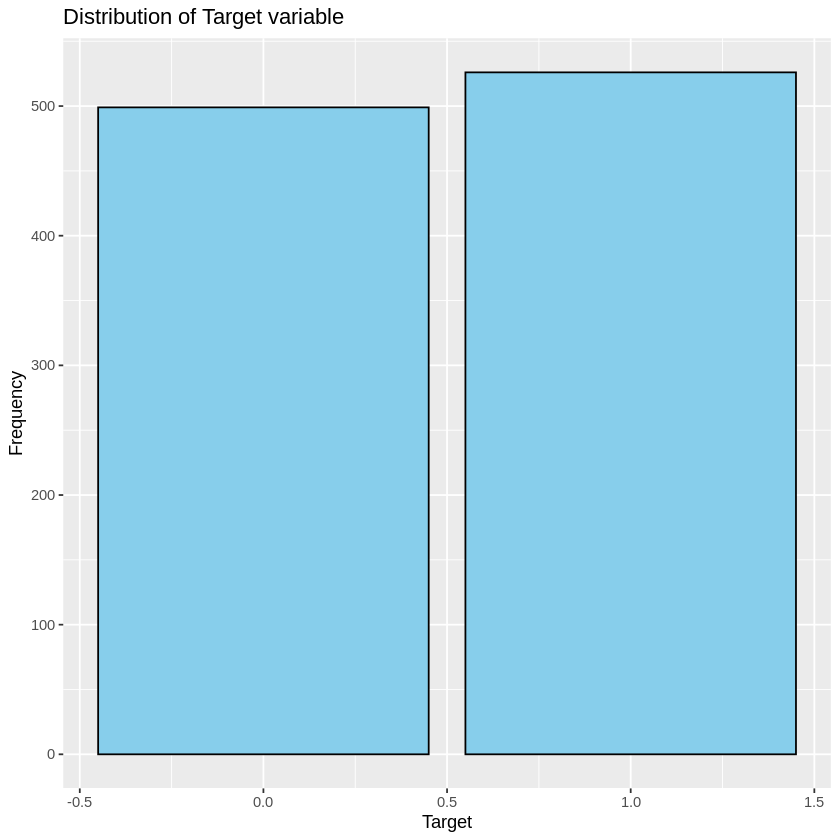

In [8]:
ggplot(df, aes(x=target))+ geom_bar(fill="skyblue", color="black", stat="count") + labs(title="Distribution of Target variable", x="Target", y="Frequency")

***observe that number of instances of patients with heart disease is slightly more than those without heart disease***

***HEART DISEASE VS AGE***

Warning message in geom_histogram(bindwith = 4, position = "dodge", color = "grey"):
“Ignoring unknown parameters: `bindwith`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


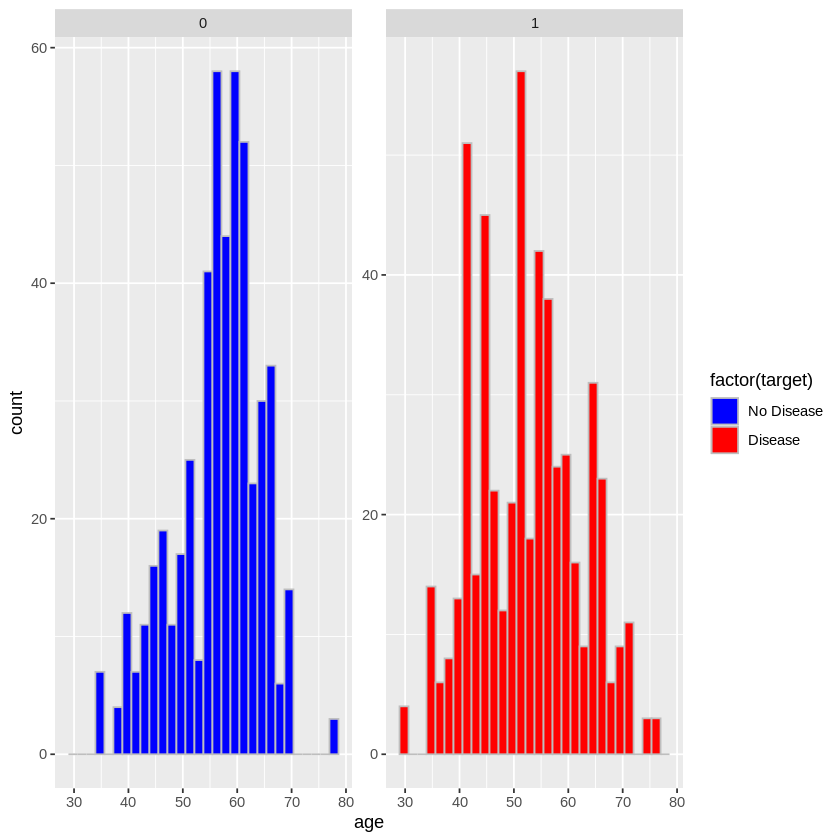

In [9]:
ggplot(df, aes(x=age, fill=factor(target))) +
geom_histogram(bindwith = 4, position = "dodge", color = "grey")+
scale_fill_manual(values =c("0" = "blue", "1" = "red"), labels= c("No Disease", "Disease"))+
facet_wrap(~target, scales = "free_y")

***HEART DISEASE VS GENDER***



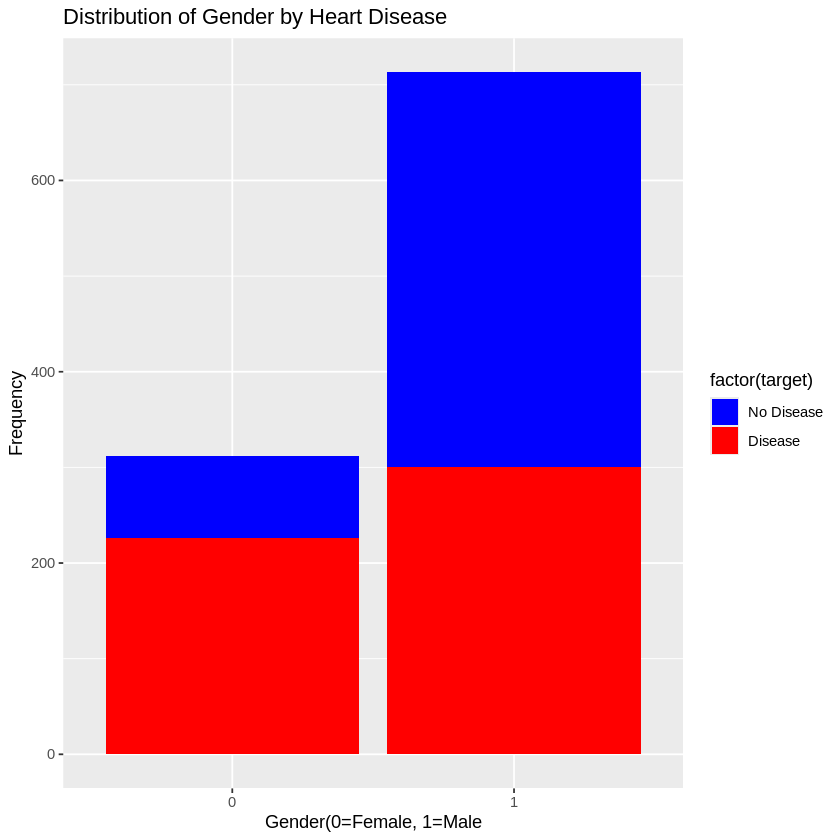

In [10]:
ggplot(df, aes(x=factor(sex), fill= factor(target))) +
geom_bar()+
labs(title="Distribution of Gender by Heart Disease", x="Gender(0=Female, 1=Male", y="Frequency")+
scale_fill_manual(values= c("0" = "blue", "1"= "red"), labels= c("No Disease", "Disease"))

***Correlation Matrix (Relationship between features)***

Warning message in geom_text(data = textData, aes(label = !!as.name("diagLabel")), :
“Ignoring unknown parameters: `layout_exp`”


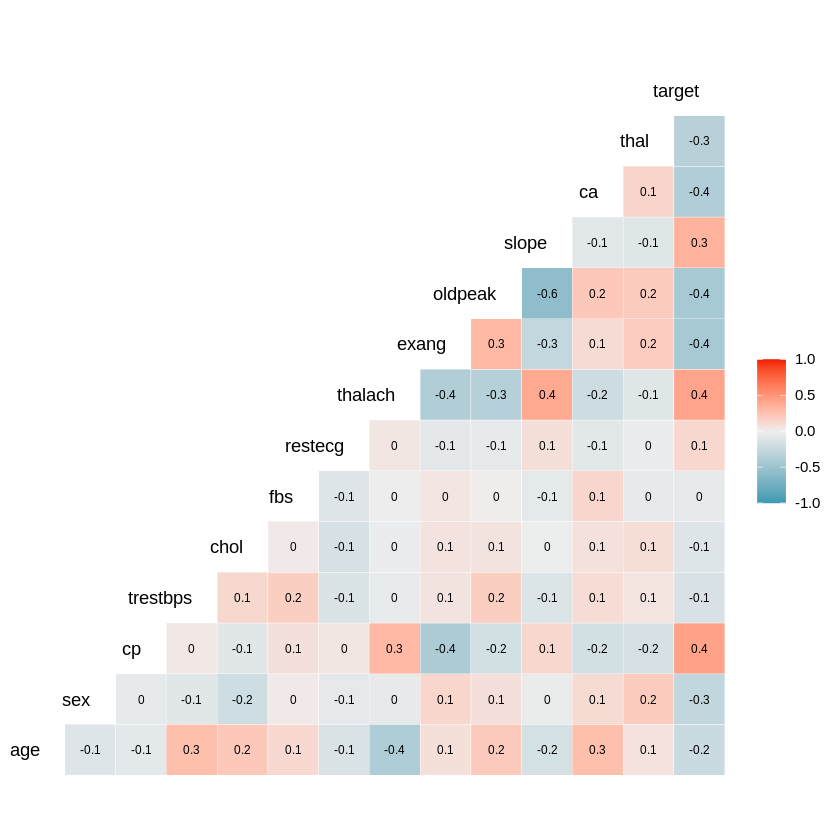

In [11]:
ggcorr(df, label=TRUE, label_size=2.5, hjust = 1, layout_exp =2)

***slope, thalach, cp have positive correlation with our target variable***
***fbs has 0 correlation with our target variable. it doesnt have any relationship with target variable.***

# DATA PREPROCESSING

***by EDA we know that there exists some categorical variables that are not suitable for model training. we need to encode these variables***

In [12]:
heart <- df %>%
  mutate(sex= as.factor(sex), cp=as.factor(cp), fbs=as.factor(fbs), restecg=as.factor(restecg), exang=as.factor(exang),
        slope=as.factor(slope), ca=as.factor(ca), thal=as.factor(thal), target=as.factor(target))

str(heart)

'data.frame':	1025 obs. of  14 variables:
 $ age     : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 2 2 2 1 1 2 2 2 2 ...
 $ cp      : Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ trestbps: int  125 140 145 148 138 100 114 160 120 122 ...
 $ chol    : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fbs     : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 1 1 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 2 1 2 2 2 1 3 1 1 1 ...
 $ thalach : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope   : Factor w/ 3 levels "0","1","2": 3 1 1 3 2 2 1 2 3 2 ...
 $ ca      : Factor w/ 5 levels "0","1","2","3",..: 3 1 1 2 4 1 4 2 1 3 ...
 $ thal    : Factor w/ 4 levels "0","1","2","3": 4 4 4 4 3 3 2 4 4 3 ...
 $ target  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...


In [13]:
features <- df[, c('age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')]
target <- df$target



# DATA NORMALIZATION

In [16]:
preprocessParams <- preProcess(features, method = c("center", "scale"))
features_normalized <- predict(preprocessParams, features)


# SPLITTING DATASET

In [18]:
split <- createDataPartition(target, p =0.8, list=FALSE)
X_train <- features_normalized[split, ]
X_test <-  features_normalized[-split, ]
y_train <- target[split]
y_test <- target[-split]

In [19]:
print(paste("X_train shape: ", paste(dim(X_train), collapse="x")))
print(paste("X_test shaoe: ", paste(dim(X_test), collapse="x")))

[1] "X_train shape:  820x12"
[1] "X_test shaoe:  205x12"


***Combine features and and target into a single data frame***

In [20]:
train_data <- as.data.frame(cbind(target = y_train, X_train))


# TRAINING MODEL

In [21]:
model <- glm(target ~., data = train_data, family = "binomial")


***Evaluate***

In [23]:
predictions <- predict(model, newdata = as.data.frame(X_test), type="response")
binary_predictions <- ifelse(predictions >= 0.5, 1, 0)

result <- data.frame(actual = y_test, predicted =binary_predictions)

confusionMatrix(data = as.factor(binary_predictions), reference = as.factor(y_test), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 93 13
         1 14 85
                                          
               Accuracy : 0.8683          
                 95% CI : (0.8142, 0.9114)
    No Information Rate : 0.522           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7362          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8673          
            Specificity : 0.8692          
         Pos Pred Value : 0.8586          
         Neg Pred Value : 0.8774          
             Prevalence : 0.4780          
         Detection Rate : 0.4146          
   Detection Prevalence : 0.4829          
      Balanced Accuracy : 0.8683          
                                          
       'Positive' Class : 1               
                                    

accuracy= 86.83%

*** Confusion Matrix:***

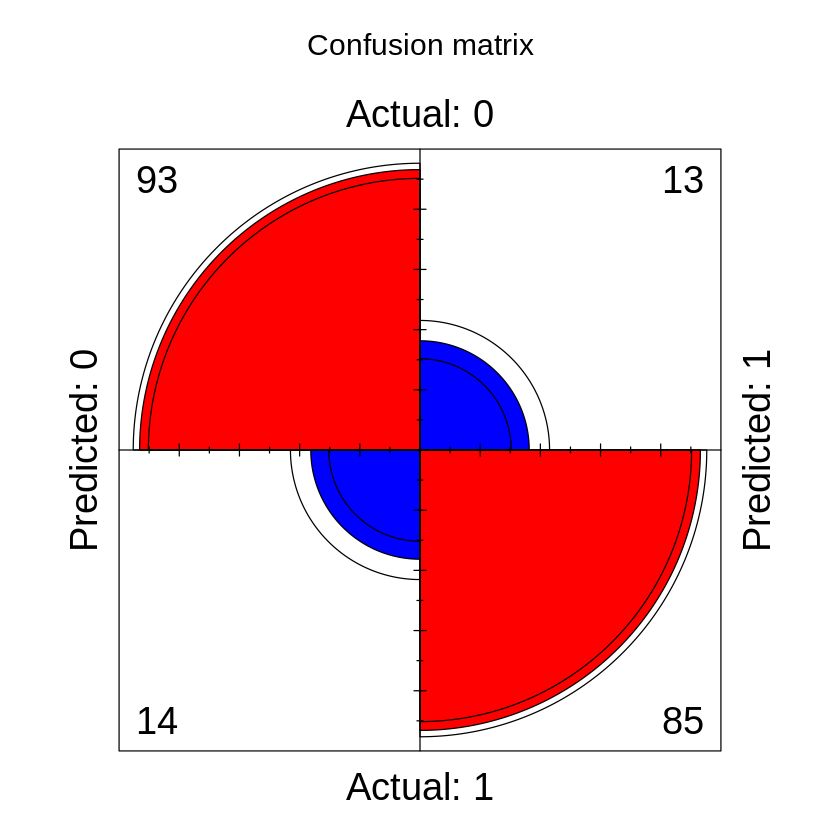

In [25]:
conf_matrix <- table(factor(binary_predictions, levels= c("0", "1")),
   factor(y_test, levels=c("0","1")))

dimnames(conf_matrix) <- list(Actual = c("0", "1"),Predicted = c("0", "1"))

fourfoldplot(conf_matrix, color = c("blue", "red"), main= "Confusion matrix")

# PREDICTING NEW VALUES

In [28]:
test_data <- as.data.frame(cbind(target= y_test, X_test))

predictions <- predict(model, newdata = as.data.frame(test_data[, -1]), type="response")

binary_predictions <- ifelse(predictions>= 0.5,1,0)

res = data.frame(actual = test_data$target, predicted= binary_predictions)

print(result)

     actual predicted
1         0         0
7         0         0
12        0         0
15        0         1
29        0         1
37        1         1
39        1         0
45        1         1
53        1         1
54        0         0
56        0         0
58        1         1
59        0         0
71        0         0
72        0         0
74        0         0
83        0         0
87        1         1
101       1         1
104       1         1
117       0         0
120       1         1
121       1         1
131       1         1
136       0         0
139       1         1
140       1         1
141       0         0
143       0         0
152       0         0
159       1         0
160       1         1
165       0         0
167       0         0
168       1         1
182       1         1
188       0         0
191       1         1
198       1         1
204       1         1
213       0         0
214       1         1
223       1         1
232       1         1
238       